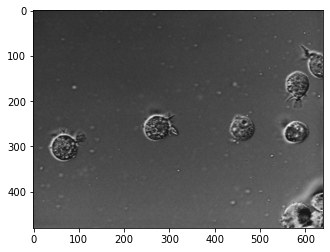

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../sample/1.tiff', 1)
plt.imshow(img)

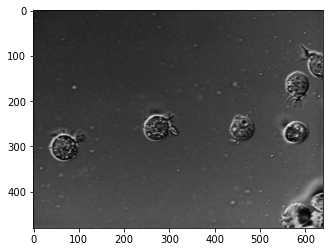

In [7]:
blue_channel = img[:,:,0]
plt.imshow(blue_channel, cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 1.2000e+01, 4.7000e+01, 5.1000e+01, 1.3500e+02,
        9.5000e+01, 4.8300e+02, 1.5700e+02, 3.0200e+02, 1.7000e+02,
        3.1700e+02, 1.4000e+02, 2.7900e+02, 1.8800e+02, 3.1700e+02,
        1.5000e+02, 3.8400e+02, 1.6500e+02, 4.2800e+02, 2.5300e+02,
        7.1300e+02, 5.6000e+02, 1.8060e+03, 1.5650e+03, 5.2350e+03,
        3.7990e+03, 9.9370e+03, 5.8900e+03, 1.2695e+04, 6.4790e+03,
        1.2673e+04, 6.2130e+03, 1.2595e+04, 6.4460e+03, 1.3355e+04,
        7.2000e+03, 1.4441e+04, 7.3730e+03, 1.5107e+04, 7.2390e+03,
        1.4329e+04, 6.7900e+03, 1.2692e+04, 6.0650e+03, 1.1854e+04,
        5.7800e+03, 1.1649e+04, 5.6900e+03, 1.1576e+04, 5.6170e+03,
        1.1134e+04, 5.1180e+03, 8.8900e+03, 3.7450e+03, 5.7580e+03,
        2.3020e+03, 3.6080e+03, 1.5090e+03, 2.5040e+03, 1.0100e+03,
        1.5220e+03, 5.2200e+02, 8.5400e+02, 3.38

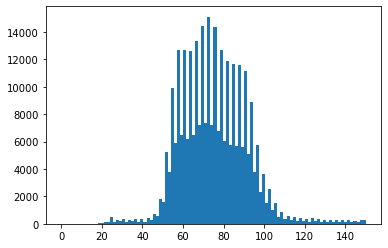

In [4]:
plt.hist(blue_channel.flat, bins=100, range=(0,150))

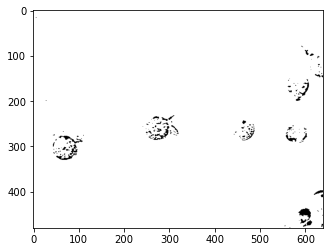

In [8]:
background = (blue_channel <= 40)
nuclei = (blue_channel > 40)
plt.imshow(nuclei, cmap="gray")

40.0


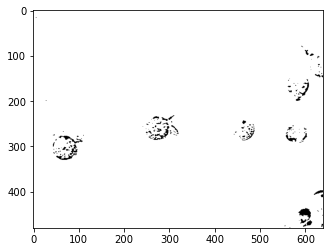

In [16]:
ret1, thresh1 = cv2.threshold(blue_channel, 40, 255, cv2.THRESH_BINARY)
print(ret1)
plt.imshow(thresh1, cmap='gray')

80.0


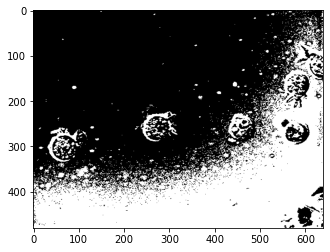

In [21]:
# automated thresholding 
ret2, thresh2 = cv2.threshold(blue_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret2)
plt.imshow(thresh2, cmap='gray')

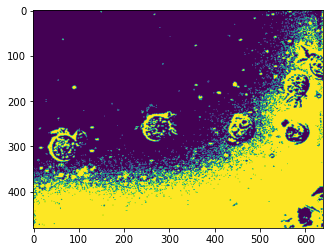

In [22]:
import numpy as np

regions1 = np.digitize(blue_channel, bins=np.array([ret2]))
plt.imshow(regions1)

/Users/chelsea/miniforge3/envs/tensorflow/lib/python3.8/site-packages/skimage/_shared/utils.py:274: FutureWarning: `n_iter_max` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  warnings.warn(self.warning_msg.format(
/var/folders/39/8ws68thx3xq2pw3b6qx114lw0000gn/T/ipykernel_66153/2662629521.py:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_img= denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)


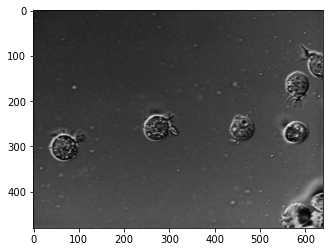

In [37]:
from skimage.filters import threshold_multiotsu

img = cv2.imread('../sample/1.tiff', 0)

#Denoise for better results
from skimage.restoration import denoise_tv_chambolle
denoised_img= denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
plt.imshow(img, cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.8000e+01, 9.8000e+01, 1.3500e+02, 5.7800e+02,
        4.5900e+02, 3.4100e+02, 4.1800e+02, 3.3500e+02, 4.6700e+02,
        3.8400e+02, 5.9300e+02, 5.8100e+02, 1.6630e+03, 2.6530e+03,
        9.0340e+03, 1.5827e+04, 1.2695e+04, 1.9152e+04, 1.2460e+04,
        1.9323e+04, 1.4026e+04, 2.1814e+04, 1.5107e+04, 2.1568e+04,
        1.9482e+04, 1.1994e+04, 1.7553e+04, 1.1491e+04, 1.7193e+04,
        1.1134e+04, 1.4008e+04, 6.8290e+03, 6.8670e+03, 3.2260e+03,
        3.5140e+03, 2.0440e+03, 8.5400e+02, 9.2900e+02, 5.5500e+02,
        6.3600e+02, 3.8800e+02, 5.2700e+02, 3.8900e+02, 5.0100e+02,
        4.6200e+02, 2.9400e+02, 4.8400e+02, 2.6100e+02, 3.8100e+02,
        2.5500e+02, 3.5500e+02, 2.9000e+02, 3.6800e+02, 2.4700e+02,
        3.7200e+02, 2.7700e+02, 1.5500e+02, 2.7000e+02, 1.5700e+02,
        2.0800e+02, 1.3000e+02, 1.8000e+02, 1.4300e+02, 2.0100e+02,
        1.8300e+02, 1.1600e+02, 1.7800e+02, 1.03

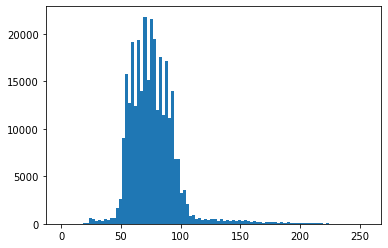

In [38]:
plt.hist(img.flat, bins=100, range=(0,255)) #.flat

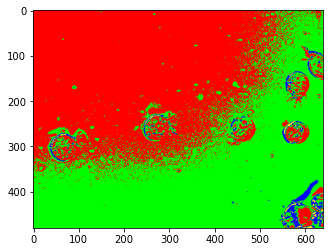

In [39]:
#Can perform manual segmentation but auto works fine
region1 = (img >= 0) & (img <75)
region2 = (img >= 75) & (img <140)
region3 = (img >= 140) & (img <200)
region4 = (img >= 200) & (img <=255)
all_regions = np.zeros((img.shape [0], img.shape [1], 3))
all_regions[region1] = (1,0,0)
all_regions[region2] = (0,1,0)
all_regions[region3] = (0,0,1)
all_regions[region4] = (1,1,0)
plt.imshow(all_regions)

In [45]:
# Apply multi-Otsu threshold instead of manual one with 4 classes
thresholds = threshold_multiotsu(img, classes=4)

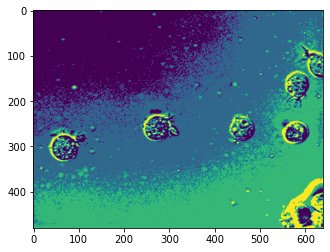

In [46]:
#np.digitize assign values 0, 1, 2, 3,... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions)

In [56]:
segm1 = (regions == 0)
segm2 = (regions == 1)
segm3 = (regions == 2)
segm4 = (regions == 3)

from scipy import ndimage as nd
segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))
segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))
segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))
segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

In [58]:
all_segments_cleaned = np.zeros((img.shape[0], img.shape[1], 3))
all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

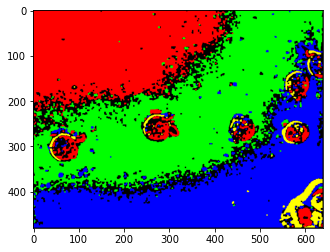

In [59]:
plt.imshow(all_segments_cleaned) #ALL the noise should be cleaned now
plt.imsave("result.jpg", all_segments_cleaned)

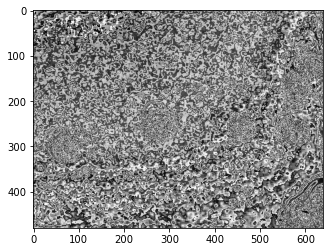

In [63]:
# using texture to segment images

import matplotlib.pyplot as plt
from skimage import io

import numpy as no
from skimage.filters import threshold_otsu
import cv2

img = io.imread('../sample/1.tiff', as_gray=True)

# Variance - not a great way to quantify texture
from scipy import ndimage
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

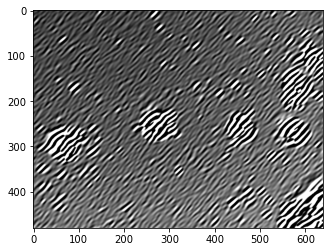

In [69]:
#GABOR A great filter for texture but usually efficient
#if we know exact parameters. Good choice for generating features
#for machine Learning
ksize = 45
theta = np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap="gray")

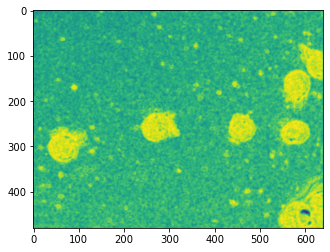

In [73]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

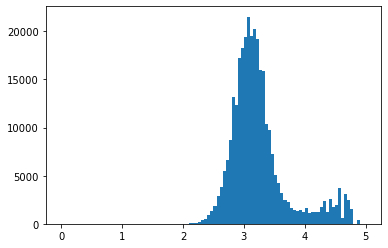

In [78]:
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
#Scratch Analysis single image
#Now Let us use otsu to threshold high vs Low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))
thresh = threshold_otsu(entropy_img)

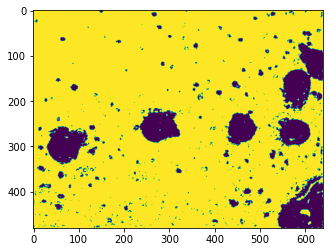

In [80]:
# Now Let us binarize the entropy image
binary = entropy_img <= thresh
plt.imshow (binary)

In [81]:
scratch_area = np. sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")
scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area is:  267857 Square pixels
Scratched area in sq. microns is:  54241.0425 Square pixels


In [90]:
# Scratch assay analysis using texture for segmentation

import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import disk
# Scratch Assay on time series images
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5154238/
import numpy as np
from skimage.filters.rank import entropy
from skimage.filters import threshold_otsu
#Use glob to extract image names and Load them.
import glob
time = 0
scale = 0.45 # microns/pixel
time_list=[]
area_list=[]
path = "../sample/*.*"
for file in glob.glob(path):
    img=io.imread(file)
    entropy_img= entropy(img, disk (3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    #Put the code from single image segmentation in af for Loop
    # to apply segmentaion to all images
    scratch_area = np.sum(binary == 1)
    scratch_area = scratch_area*((scale) **2) #Convert to microns from pixel units
    print("time=", time, "hr ", "Scratch area=", scratch_area, "um\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    #print(time_list, area_list)
    time += 1
          

plt.plot(time_list, area_list, 'bo') #Print blue dots scatter plot

time= 0 hr  Scratch area= 54241.0425 um²


ValueError: Image dimensions and neighborhood dimensionsdo not match

In [93]:
#Print slope, intercept
from scipy.stats import linregress #Linear regression
#print (Linregress (time_list, area_list))
slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
print("r-squared: %f" % r_value**2)

y =  nan x  +  nan
R² =  0.0
r-squared: 0.000000


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.8000e+01, 9.8000e+01, 1.3500e+02, 5.7800e+02,
        4.5900e+02, 3.4100e+02, 4.1800e+02, 3.3500e+02, 4.6700e+02,
        3.8400e+02, 5.9300e+02, 5.8100e+02, 1.6630e+03, 2.6530e+03,
        9.0340e+03, 1.5827e+04, 1.2695e+04, 1.9152e+04, 1.2460e+04,
        1.9323e+04, 1.4026e+04, 2.1814e+04, 1.5107e+04, 2.1568e+04,
        1.9482e+04, 1.1994e+04, 1.7553e+04, 1.1491e+04, 1.7193e+04,
        1.1134e+04, 1.4008e+04, 6.8290e+03, 6.8670e+03, 3.2260e+03,
        3.5140e+03, 2.0440e+03, 8.5400e+02, 9.2900e+02, 5.5500e+02,
        6.3600e+02, 3.8800e+02, 5.2700e+02, 3.8900e+02, 5.0100e+02,
        4.6200e+02, 2.9400e+02, 4.8400e+02, 2.6100e+02, 3.8100e+02,
        2.5500e+02, 3.5500e+02, 2.9000e+02, 3.6800e+02, 2.4700e+02,
        3.7200e+02, 2.7700e+02, 1.5500e+02, 2.7000e+02, 1.5700e+02,
        2.0800e+02, 1.3000e+02, 1.8000e+02, 1.4300e+02, 2.0100e+02,
        1.8300e+02, 1.1600e+02, 1.7800e+02, 1.03

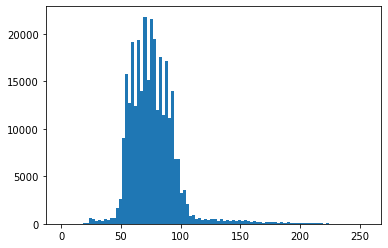

In [96]:
# Image segmentation followed by measurements
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2

# The input image.
#mage=img_as_ubyte (rgb2gray (io. imread("images/cast_iron1.tif")))
image = cv2.imread("../sample/1.tiff", 0)
scale = 0.6 #microns/pixel
plt.hist(image.flat, bins=100, range= (0,255)) #.flat returns the flattened numpy array

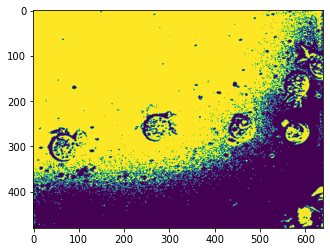

In [98]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)
#Generate thresholded image
thresholded_img= image < threshold
plt.imshow (thresholded_img)

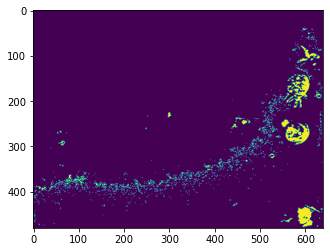

In [100]:
#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border (thresholded_img)
plt.imshow(edge_touching_removed)

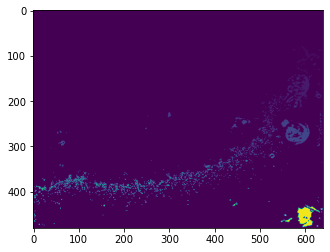

In [101]:
#Label connected regions of an integer array using measure. Label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2
label_image = measure.label(edge_touching_removed, connectivity=image.ndim)
plt.imshow(label_image)

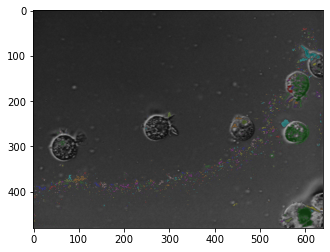

In [102]:
#Return an RGB image where color-coded Labels are painted over the image.
#Using Label2rgb
image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay)
plt.imsave("labeled.jpg", image_label_overlay)

In [104]:
#Compute image properties and return them as a pandas-compatible table.
#Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, Label, intensity image, major axis Length,
#max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more
props = measure.regionprops_table (label_image, image,
properties=['label','area', 'equivalent_diameter','mean_intensity', 'solidity'])
import pandas as pd
df = pd.DataFrame (props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity  solidity
0      1    24             5.527906       76.791667  0.648649
1      2     4             2.256758       77.000000  0.800000
2      3     2             1.595769       79.000000  1.000000
3      4     1             1.128379       78.000000  1.000000
4      5    12             3.908820       64.750000  0.923077


In [105]:
df = df[df['area'] > 50]
print(df.head())

     label  area  equivalent_diameter  mean_intensity  solidity
27      28   397            22.482796       55.823678  0.421892
74      75  1084            37.150931       53.284133  0.539841
90      91    88            10.585135       47.034091  0.586667
105    106    72             9.574615       73.902778  0.580645
179    180    51             8.058239       63.843137  0.850000


In [107]:
#Convert to micron scale
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())

     label  area  equivalent_diameter  mean_intensity  solidity  \
27      28   397            22.482796       55.823678  0.421892   
74      75  1084            37.150931       53.284133  0.539841   
90      91    88            10.585135       47.034091  0.586667   
105    106    72             9.574615       73.902778  0.580645   
179    180    51             8.058239       63.843137  0.850000   

     area_sq_microns  equivalent_diameter_microns  
27            142.92                    13.489677  
74            390.24                    22.290559  
90             31.68                     6.351081  
105            25.92                     5.744769  
179            18.36                     4.834943  


In [110]:
# Blob detection

import matplotlib.pyplot as plt
import numpy as np
import cv2
# The input image.
image = cv2.imread("../sample/1.tiff", 0)
#image= cv2.imread("images/Osteosarcoma_01_small.tif")
#Extract only blue channel as DAPI/ nuclear (blue) staining is the best
#channel to perform cell count.
#image=image[:,:,0]
#No need to pre-threshold as blob detector has build in threshold.
#We can supply a pre-thresholded image.
# Set up the Simple Blobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params ()
# Define thresholds
#Can define thresholdStep. See documentation.
params.minThreshold = 0
params.maxThreshold = 255
# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 10000
# Filter by Color (black=0)
params.filterByColor = False # Set true for cast iron as we'll be detecting black regions
params.blobColor = 0

In [113]:
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 1
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5
params.maxConvexity = 1
# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio=0
params.maxInertiaRatio = 1
# Distance Between Blobs
params.minDistBetweenBlobs = 0
# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create (params)
#Detect blobs
keypoints = detector.detect(image)
print("Number of blobs detected are: ", len(keypoints))

Number of blobs detected are:  8


True

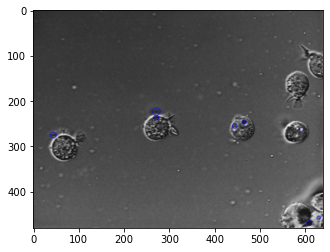

In [117]:
# Draw blobs
img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_blobs)
#Save result
cv2.imwrite("particle_blobs.jpg", img_with_blobs)

In [119]:
# Nuclei segmentation using watershed

img = cv2.imread("../sample/1.tiff")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
#channel to perform cell count.
cells=img[:,:,0] #Blue channel. Image equivalent to grey image.
pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)
#Threshold image to binary using OTSU. ALL thresholded pixels will be set to 255
ret1, thresh = cv2.threshold (cells, 0, 255, cv2. THRESH_BINARY+cv2. THRESH_OTSU)
#Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones ((3,3), np. uint8)
opening = cv2.morphologyEx(thresh, cv2. MORPH_OPEN, kernel, iterations = 2)

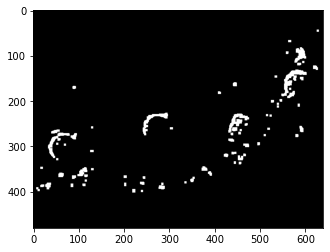

In [120]:
from skimage.segmentation import clear_border
opening = clear_border (opening)
plt.imshow(opening, cmap='gray') 

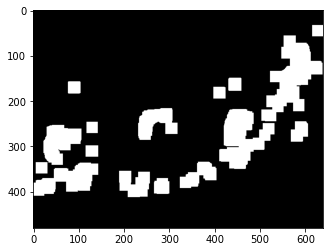

In [121]:
sure_bg = cv2.dilate (opening, kernel, iterations=10)
plt.imshow(sure_bg, cmap='gray') #Dark region is our sure background

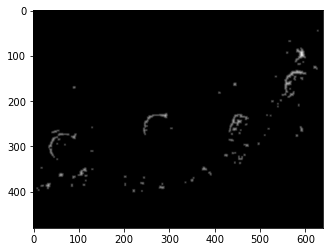

In [124]:
dist_transform = cv2.distanceTransform (opening, cv2.DIST_L2,5)
plt.imshow(dist_transform, cmap='gray') #Dist transformed img.

7.5906982


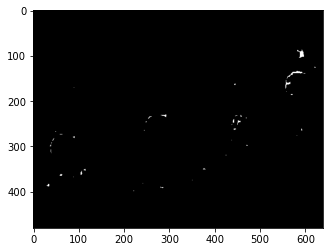

In [125]:
print(dist_transform.max()) #gives about 21.9
ret2, sure_fg = cv2.threshold (dist_transform, 0.5*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

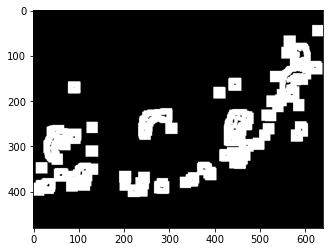

In [126]:
sure_fg = np. uint8 (sure_fg) #Convert to uint8 from float
unknown = cv2.subtract (sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

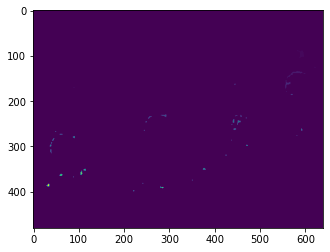

In [128]:
ret3, markers = cv2.connectedComponents (sure_fg)
plt.imshow(markers)

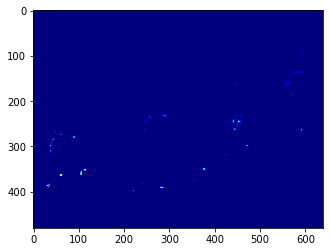

In [129]:
markers [unknown==255] = 0
plt.imshow (markers, cmap='jet')

In [130]:
#Now we are ready for watershed filling.
markers = cv2.watershed (img, markers)
#Let us color boundaries in yellow.
#Remember that watershed assigns boundaries a value of -1
img[markers == -1] = [0,255,255]

"\ncv2.imshow('Overlay on original image', img)\ncv2.imshow('Colored Grains', img2)\ncv2.waitkey (0)\n"

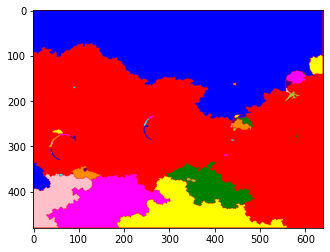

In [131]:
img2= color.label2rgb(markers, bg_label=0)
plt.imshow(img2)
'''
cv2.imshow('Overlay on original image', img)
cv2.imshow('Colored Grains', img2)
cv2.waitkey (0)
'''